# Исследование продаж игр
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Подготовка данных
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
### Исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
### Портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?
### Проверька гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
- Поясните:
-- Как вы сформулировали нулевую и альтернативную гипотезы;
-- Какой критерий применили для проверки гипотез и почему.
### Общий вывод


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Исследуем данные

In [2]:
try:
    games = pd.read_csv('C:\\Users\\эйч пи\\Desktop\\Учеба\\Аналитик данных\\jupyter notebook\\projekts\\game\\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.info() # определим типы данных и пропуски в данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
pd.DataFrame(round(games.isna().mean()*100,1)).style.background_gradient('coolwarm') # доля пропусков

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


In [5]:
games.describe().T


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [6]:
display(games['Platform'].unique()) # уникальные значения данных
display(games['Genre'].unique())
display(games['User_Score'].unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

#### Рузультат исследования  данных в таблце:
- В таблице присутствуют данные с 1980 до 2016 года. 
- Плафтформы и жанры заполнены на первый взгляд корректно. 
- В колонках Critic_Score, User_Score и Rating много пропусков.
- User_Score также их надо перевести в числовой формат.
- В User_Score есть значение tbd - заменить его на nan
- Год выпуска отсутствует в 1,6% записей, его можно удалить нужно перести в формат дат.
- Переименовать колонки - перевести в нижний регистр.
- нет названия у 2 игр. Удалим эти строки.


In [7]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
11320,The King of Fighters '98: Dream Match Never Ends,PS,1999.0,Fighting,0.05,0.03,0.00,0.01,NaN,NaN,NaN
14386,Airship Q,PSV,2015.0,Platform,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1880,Project CARS,PS4,2015.0,Racing,0.20,0.70,0.02,0.16,83.0,6.6,E
15164,Hyakka Hyakurou: Sengoku Ninpoujou,PSV,2016.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5354,Classic NES Series: Ice Climber,GBA,2004.0,Platform,0.10,0.04,0.20,0.01,66.0,tbd,E
5410,Spy Hunter,XB,2002.0,Racing,0.25,0.07,0.00,0.01,71.0,tbd,T
4057,"Transformers: Revenge of the Fallen (XBox 360,...",PS2,2009.0,Shooter,0.25,0.01,0.00,0.22,NaN,NaN,NaN
10891,X-COM: UFO Defense,PS,1995.0,Strategy,0.05,0.04,0.00,0.01,NaN,NaN,NaN
5960,WinBack: Covert Operations,PS2,2000.0,Shooter,0.14,0.11,0.00,0.04,66.0,7.7,T


### Предобработка данных

In [8]:
games.columns = [x.lower() for x in games.columns] # приведем к нижнему регистру
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
games = games.dropna(subset=['year_of_release', 'name']) # удалил строки без указания года и на названия
#можно было извлечь из названия, но их мало, считаю, что не повлияет на результаты
games['year_of_release'] = games['year_of_release'].astype('int64')

Вероятная причина - ошибка при выгрузке файла. Иных причин отсутствия данных в годе выпуска не вижу.

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN) # заменим неопределенные рейтинги на NaN
games['user_score'] = games['user_score'].astype('float64')

Заменил данные в столбце user_score на NaN, т.к. 'tbd' расшифровывается как 'to be determined', то есть 'еще не определен', соответсвенно рейтинга еще нет.
Отсутствие данных - не поставлена оценка пользователей. 

In [11]:
display(games['rating'].unique()) 

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг менялся в 1996 году и "К-А" ("Kids to Adults") стало "Е" («Everyone»). Внесем изменение - заменим на "Е".

In [12]:
games['rating'] = games['rating'].replace('K-A','E') # приведем рейтинги к единой системе
games['rating'] = games['rating'].fillna('RP')

In [13]:
display(games['rating'].unique()) 

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
display(games['critic_score'].unique())
display(games['user_score'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

##### Итоги предобработки:
- колонки приведены к стандарту - регистр
- удалены строки с пропуском года выхода и пропуском названия игры
- заменил тип данных в годе на int
- заменил данные "не определены" в рейтинге на NaN
- привел к единому значению рейтинг "для всех" согласно смене обозначения в 1996 году
- пропуски в 'critic_score'и 'user_score'заполнять на стал - нет угикального рецепта заменить рейтинги.

### Суммируем продажи

In [16]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [17]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


## Исследовательский анализ данных

### Распределение игр по годам

Text(0.5, 1.0, 'total_sales_year')

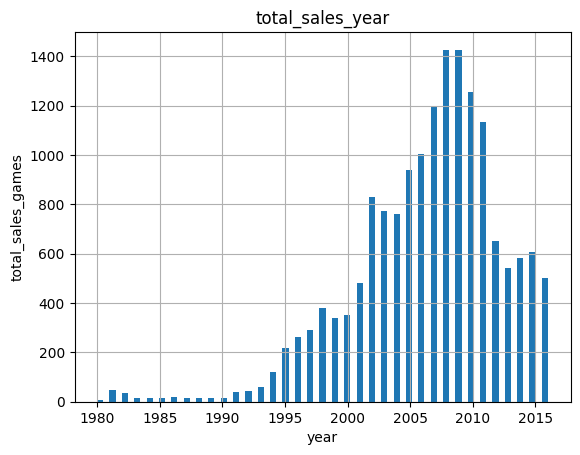

In [18]:
ax = games['year_of_release'].plot(kind='hist', bins=73, grid=True)
ax.set_xlabel('year')
ax.set_ylabel('total_sales_games')
ax.set_title('total_sales_year')

#### Продажи по годам.
Пик продаж игр приходится на 2005- 2011 годы, потом идет резкий спад. Продажи до 1995 года минимальные.Это связано с мощностью компьютеров - процессор Pentium появляется в 1993 году и это вызвало рост продаж игр.
Pentium 4 и затем Pentium M дали новый скачек. Рост продолжался до пика 2008-2009 годов, когда компьютеры с нужными характеристиками были доступны многим.
После 2012 года рынок сжался в 2 раза. Игры стали тяжелее, железо для них необходимо более мощное и дорогое и продавцы игр нашли свою целевую аудиторию и сосредоточились на них.
Считаю, что за актуальные данные нужно брать период с 2012 по 2016 годы.

### Распределение игр по платформам

Text(-5.555555555555555, 0.5, 'platform')

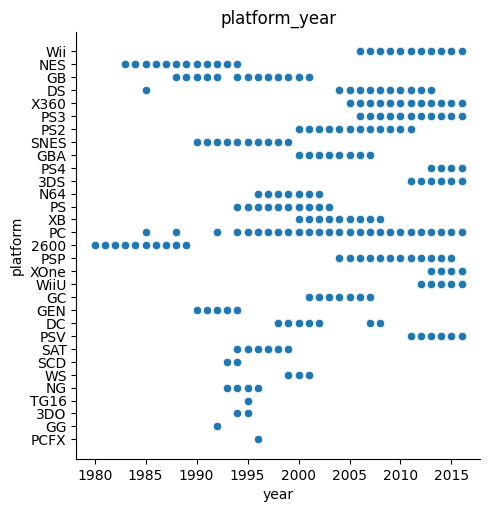

In [19]:
sns.relplot(data = games,y = 'platform',x = 'year_of_release')
plt.title('platform_year')
plt.xlabel('year')
plt.ylabel('platform')

In [20]:
threshold = 10
report = games.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).reset_index()
report = report.query('total_sales > @threshold')
report = report.groupby(['platform']).agg({'year_of_release': 'nunique'}).rename(columns ={'year_of_release': 'lifetime'})
median_platform_lifetime = int(report.median()[0])
print('Медианное время жизни платформы при уровне продаж минимум {} млн. составляет {} лет'.format(threshold,
                                                                                                   median_platform_lifetime))

Медианное время жизни платформы при уровне продаж минимум 10 млн. составляет 6 лет


Средняя продолжительность жизни популярных платформ от 5 до 10 лет. Есть платформы, которые живут всего 1-2 года - локальные приставки от производителей (PCFX от Nec), либо ушли в онлайн (GG).

Определим ТОП-5 платформ по продажам за все годы:

In [21]:
games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').\
sort_values(by = 'total_sales', ascending = False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Отчетливый разрыв между 6 (PS) и 7 (PS4) платформой, обусловлен тем, что PS уже не реализуется давно, а PS4 еще новая, тем не менее необходимо проверить как они продавались в hgthbjl с 2012 по 2016 годы.

In [22]:
games_12_16 = games.loc[games['year_of_release'] >=2012].reset_index()
games_12_16.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
4,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
8,60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


In [23]:
games_12_16.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').\
sort_values(by = 'total_sales', ascending = False).head(10) # продажи в разрезе платформ за актуальный период

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Топ-10 игр в 2012 - 2016 году значительно изменился PS4, PS3 и Х360  лидируют в продажах.

In [24]:
games_12_16_plot = games_12_16.pivot_table(index = 'year_of_release', columns = 'platform', \
                        values = 'total_sales', aggfunc = 'sum')
games_12_16_plot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot: xlabel='year_of_release'>

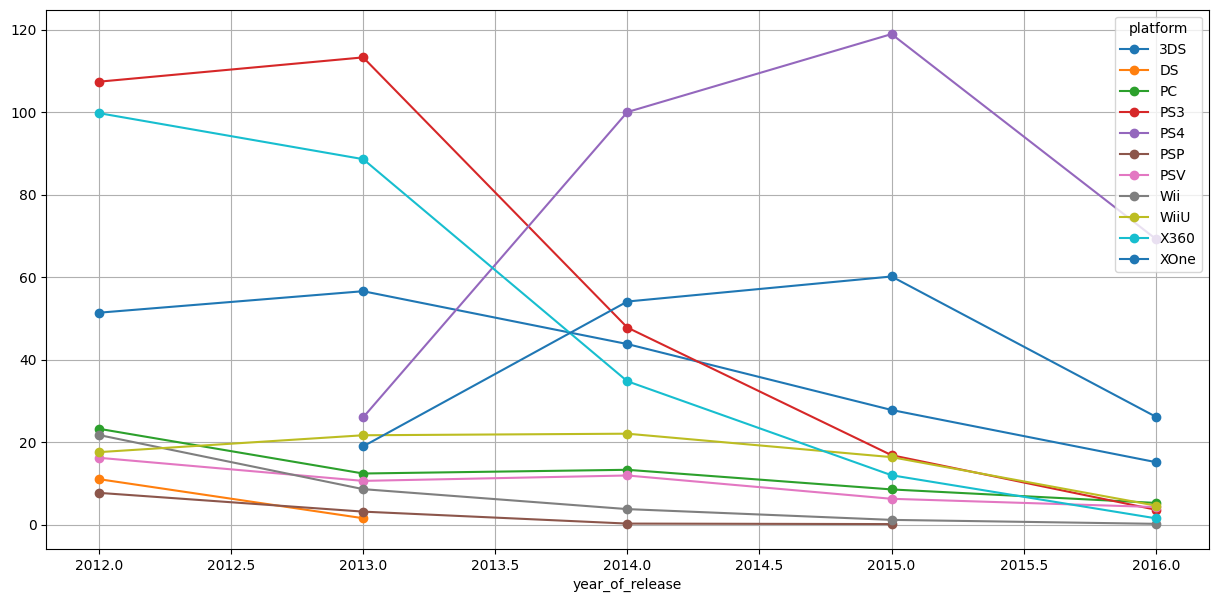

In [25]:
games_12_16_plot.plot(style='-o', grid=True, figsize=(15, 7))

<AxesSubplot: xlabel='total_sales'>

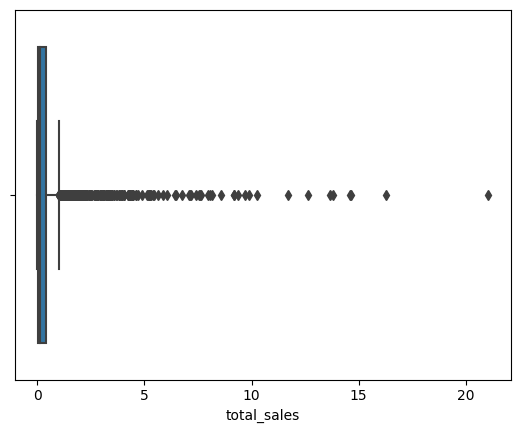

In [26]:
sns.boxplot(x=games_12_16["total_sales"])
# boxplot со совокупности продаж за актуальный период plt.boxplot(df["price_to_m"])

(0.0, 2.0)

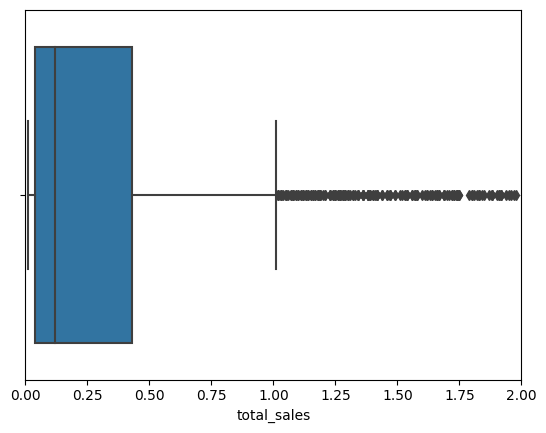

In [27]:
sns.boxplot(x=games_12_16["total_sales"]).set_xlim(0,2) 

In [28]:
games['total_sales'].median()

0.16999999999999998

Очень большой разброс в количестве проданных копий, есть выбросы в несколько миллионов копий.
Но основной массив продаж (2 и 3 квартиль) в диапазоне от 0,05 до 0,47. При этом медиана - 0,17/
Посмотрим какие платформы дают такой выброс по количеству продаж.

<AxesSubplot: xlabel='total_sales', ylabel='platform'>

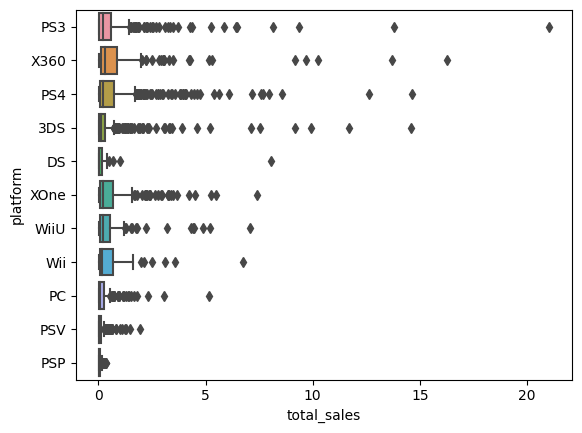

In [29]:
sns.boxplot(data=games_12_16, x='total_sales', y='platform')

###### Больше всего выбросов по количеству продаж у топовой пятерки игр: PS(3, 4), Xbox (One, 360) и 3DS.
у них больше выбросов, а значит и суперпопулярных игр.
###### Возьмем топ-5 и посмотрим на сам ящик.

(0.0, 2.0)

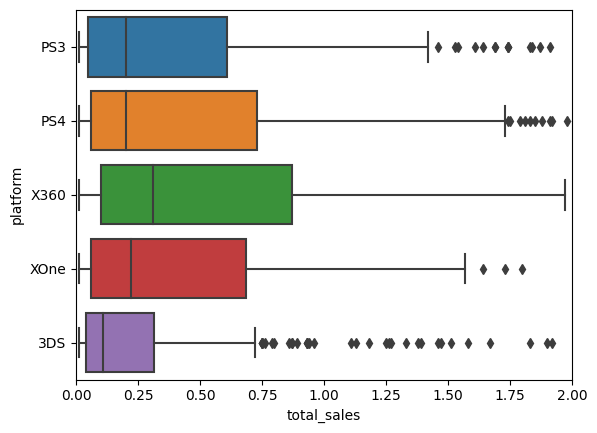

In [30]:
sns.boxplot(data=games_12_16, x='total_sales', y='platform', order=['PS3', 'PS4', 'X360','XOne', '3DS']).set_xlim(0,2)

###### Итак два производителя игр лидируют по обороту игр.
- менее стабильные продажи по количеству у Х360 - более широкий ящик, вариативность большая, верхний квартиль самый большой.
- 3DS наоборот менее вариативное количество продаж между играми. Меньше выбросов. Но количество выбросов у них не меньше.
- Медиана у всех платформ близка к первому квартилю, значит преобладают игры с небольшим количеством копий. У топовых платформ она выше, чем средняя - 0,21- 0,22
- Свежие платформы PS4 и XOne имеют схожую структуру межквартильного размаха и медиану, но PS4 имеет больший размах 4 квартиля.


In [31]:
#sns.boxplot(x=games_12_16['platform'], y=games_12_16['total_sales']).set_ylim(0,2) # boxplot по платформам

In [32]:
games_12_16.pivot_table(values='total_sales', index=['name'],columns='platform').describe().T

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.584360,1.461740,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


In [33]:
games_12_16.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')

,total_sales
year_of_release,
2012,355.84
2013,361.24
2014,331.53
2015,267.98
2016,129.94


#### Продажи по платформам. Промежуточные выводы
- за 2012-2016 годы ТОП-5 платформ:
    - PS4	314.14
    - PS3	288.79
    - X360	236.54
    - 3DS	194.61
    - XOne	159.32
- Данные о продажах за 2016 год не полный год.
- Отчетливый рост продаж с 2012 по 2015 год наблюдается у PS4 и XOne. Остальные платформы теряют продажы.
- Продажи игр на платформах PS3 (16,82), 3DS (27,78) и X360 (11,36) упали в 2015 г., но все еще на высоком уровне.
- Продажи прочих платформ постепенно сошли почти к 0.
- Продажи тотал в режнем немного превышают 1 млн. Более миллиона Х360, PS3, PS4, XOne, Wii и WiiU.
- Среднее значение по ТОП-5 платформам колеблется в пределах 0,6 - 0,8 млн.
- медиана в пределах 0,2 млн.

##### Перспективные платформы PS4, XOne, 3DS - это основные, по прежнему популярны X360 и PS3. Так же платформы для мобильных консолей PSV и WiiU (для рынка Японии имеют значение).

#### Для рассмотрения влияния рейтингов и отзывов возьмем PS3 
- Длительность продаж на рынке
- входит в ТОП-3 по всем годам и ТОП-3 за 2012 - 2016 годы.
- максимально приближена к средним показателям продаж, среднего знначения и медианы.

### Влияние рейтингов и оценок пользователей на продажи игр ТОП-5

Text(0, 0.5, 'total_sales')

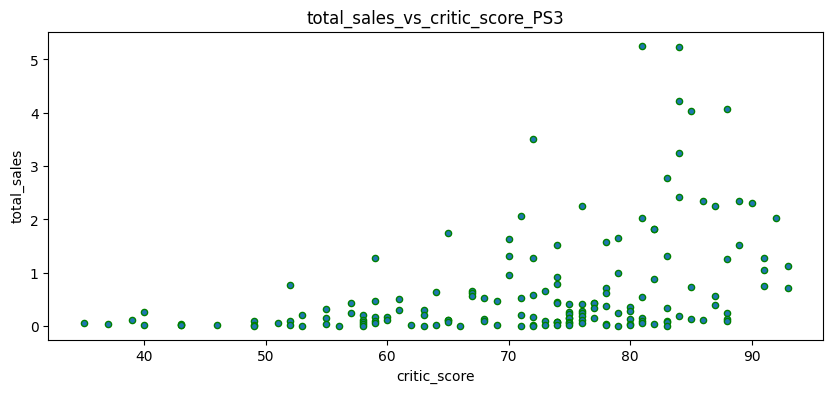

In [34]:
games_ps3 = games_12_16.loc[(games['platform'] == 'PS3') & (games_12_16['critic_score'] > 0)]
games_ps3.plot(kind='scatter', x='critic_score', y='total_sales', ec='green', figsize=(10,4))
plt.title('total_sales_vs_critic_score_PS3')
plt.xlabel('critic_score')
plt.ylabel('total_sales')


Text(0, 0.5, 'total_sales')

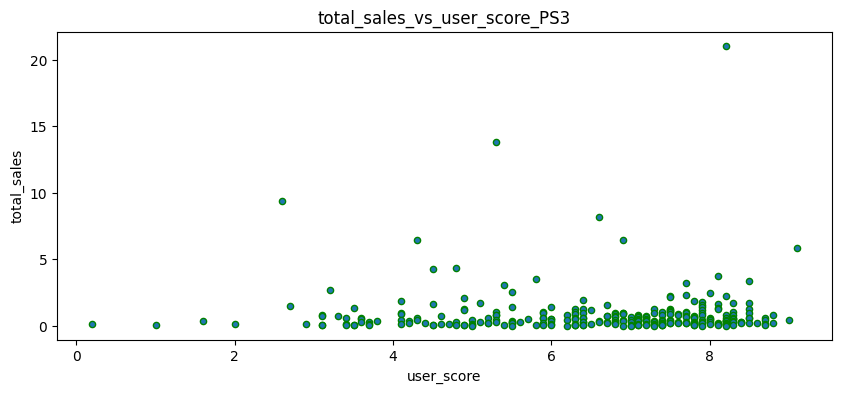

In [35]:
games_ps3 = games_12_16.loc[(games_12_16['platform'] == 'PS3') & (games_12_16['user_score'] > 0)]
games_ps3.plot(kind='scatter', x='user_score', y='total_sales', ec='green', figsize=(10,4))
plt.title('total_sales_vs_user_score_PS3')
plt.xlabel('user_score')
plt.ylabel('total_sales')

Увеличение рейтинга критиков и пользователей положительно сказывается на продаже игр, при этом рейтинг кртикиов более релевантен для пользователей при покупке игры.

Проверим правильность выводов на 4 основных платформах, кроме PS3:

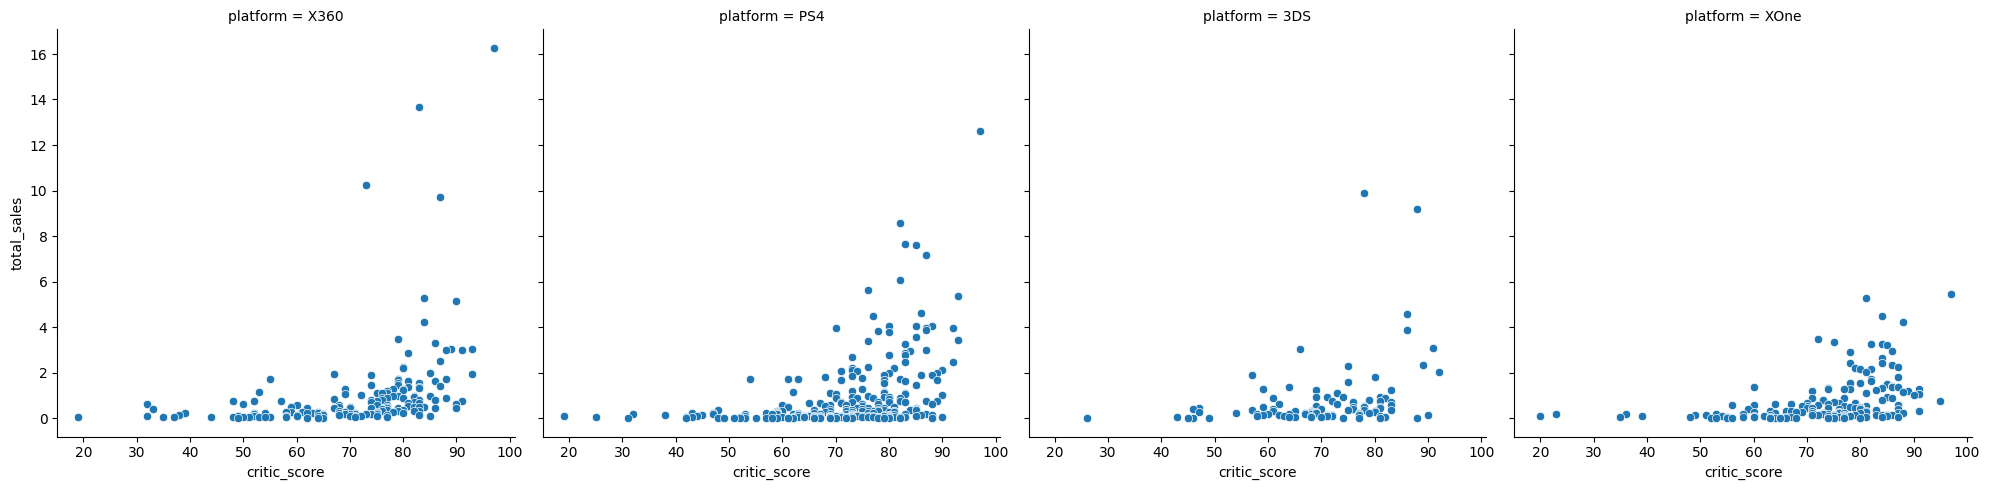

In [36]:
games_top_5=games_12_16.query('platform == ["PS4", "X360", "3DS","XOne"] and user_score > 0')
sns.relplot(
    x='critic_score', 
    y='total_sales', 
    data=games_top_5, 
    kind='scatter',               
    col='platform')

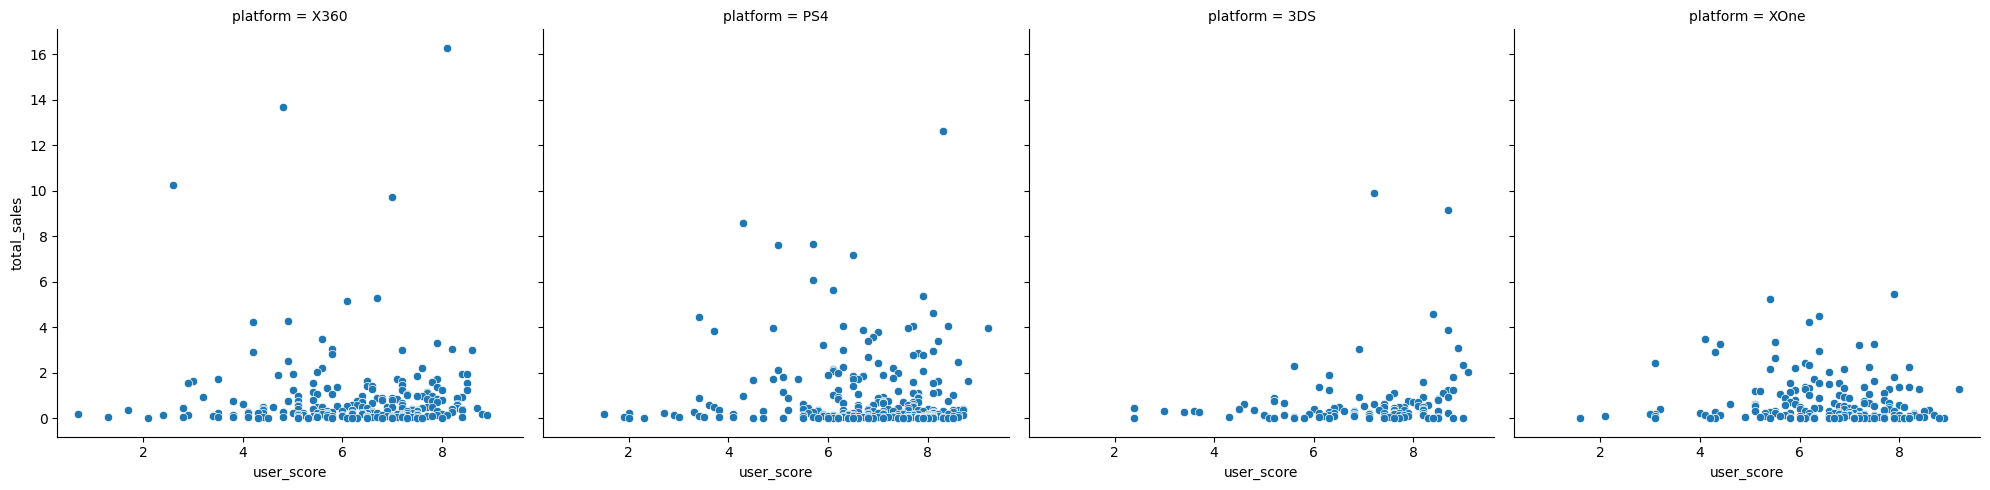

In [37]:
games_top_5 = games_12_16.query('platform == ["PS4", "X360", "3DS","XOne"] and user_score > 0')
sns.relplot(
    x='user_score', 
    y='total_sales', 
    data=games_top_5, 
    kind='scatter',               
    col='platform')

#### Влияние рейтинга на продажи. Вывод
- Игры на старых платформах более зависимы от оценки пользователей - Х360 - диаграммы очень схожи по рассеянию. 
- у новых платформ PS4 и XOne влияние пользовательского рейтинга не так сильно выражено, как влияние рейтинга экспертов. Но у них и игр с низким рейтингом относительно немного.
- в целом зависимость "рейтинг эксперта"-"продажи" имеет прямую зависимость во всех платформах Топ-5
- "рейтинг пользователя"-"продажи" имеют менее прямую зависимость.

In [38]:
print('Коэффициент корелляции продаж и рейтинга пользователя:', games_12_16['total_sales'].corr(games_12_16['user_score']).round(3))
print('Коэффициент корелляции продаж и рейтинга критиков:', games_12_16['total_sales'].corr(games_12_16['critic_score']).round(3))

Коэффициент корелляции продаж и рейтинга пользователя: 0.004
Коэффициент корелляции продаж и рейтинга критиков: 0.308


In [39]:
top_5_list = ['PS4','PS3', 'XOne', '3DS', 'X360'] # определил список для ТОП-5
for i in top_5_list:
    pt_5 = games_12_16.query('platform == @i')
    stat = pt_5.pivot_table(index=['name'], values=['critic_score', 'user_score',
                            'total_sales'], columns='platform').corr()#.sort()
    stat = stat.loc[:, 'total_sales']
    print(stat)

platform                    PS4
             platform          
critic_score PS4       0.406568
total_sales  PS4       1.000000
user_score   PS4      -0.031957
platform                    PS3
             platform          
critic_score PS3       0.332080
total_sales  PS3       1.000000
user_score   PS3      -0.004657
platform                   XOne
             platform          
critic_score XOne      0.416998
total_sales  XOne      1.000000
user_score   XOne     -0.068925
platform                    3DS
             platform          
critic_score 3DS       0.320803
total_sales  3DS       1.000000
user_score   3DS       0.197583
platform                   X360
             platform          
critic_score X360      0.360573
total_sales  X360      1.000000
user_score   X360      0.006164


#### Коэффициент колелляции подтверждает более высокое влияние на продажи рейтинга от экспертов
- Оценка критиков во всех платформах ТОП-5 влияет на продажи, коэффициент корелляции высокий от 0,32 до 0,42. Силя связи умеренная
- У новых платформ PS4 и XOne оценка пользователей не влияют на продажи - сила связи слабая.
- Исключение среди ТОП-5 платформа 3DS с хоть и слабой связью, но выше чем у остальных.
- оценке критиков потребители доверяют больше, чем таким же как они, вероятно подсознательно полагая, что могут ламеры писать отзывы.


### Влияние жанра игры на продажи

In [40]:
games_genre = games_12_16.pivot_table(index='genre', values='total_sales',
                            aggfunc=['count', 'sum','mean'])
games_genre.columns = ['genre_sales', 'total_sales_genre', 'mean_prise_game']
games_genre.sort_values(by='total_sales_genre', ascending=False)

,genre_sales,total_sales_genre,mean_prise_game
genre,,,
Action,1031,441.12,0.427856
Shooter,235,304.73,1.296723
Role-Playing,370,192.80,0.521081
Sports,268,181.07,0.675634
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Racing,115,53.50,0.465217
Fighting,109,44.49,0.408165
Simulation,80,35.12,0.439000


In [41]:
games_genre['mean_prise_game'].mean()

0.48785183586372294

#### Выводы по жанрам:
- Самые доходные по сумме продаж игры в жанре Action (441.12),Shooter (304.73) и Role-Playing (192.80)
- Самые продаваемые по количеству игр в жанре Action (1031), Role-Playing	(370) и Adventure (302)
- Самое большое количество копий одной игры у игр в жанре Shooter (1,30) и Platform (0,71), при среднем количестве копий одной игры 0,48
- Самые низкие продажи в жанрах Puzzle (28 и 4,89 млн) и Strategy (71 и 13,34 млн)
- Самое низкое количество копий игрыу жанра Adventure (0,097)

## Портрет пользователя каждого региона

<AxesSubplot: xlabel='platform'>

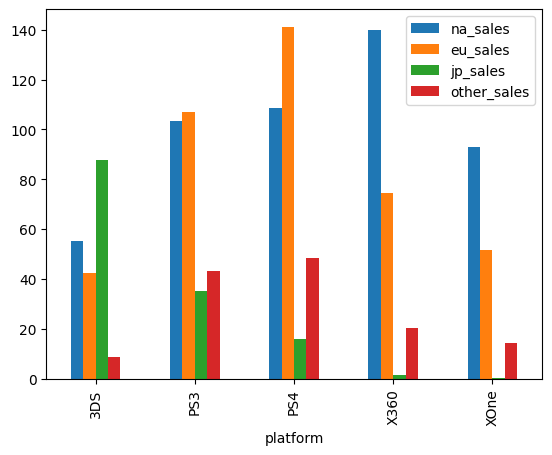

In [42]:
#platforms = ['PS4','PS3', 'XOne', '3DS', 'X360']
games_12_16.query('platform in @top_5_list').groupby('platform')[["na_sales", 'eu_sales', 'jp_sales', 'other_sales']].sum().plot(kind = 'bar')

#### Северная Америка

In [43]:
na_platform_stat = games_12_16.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5) 
# опрелделим популярные платформы по количеству копий
na_platform_stat

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

Text(0, 0.5, 'na_sales')

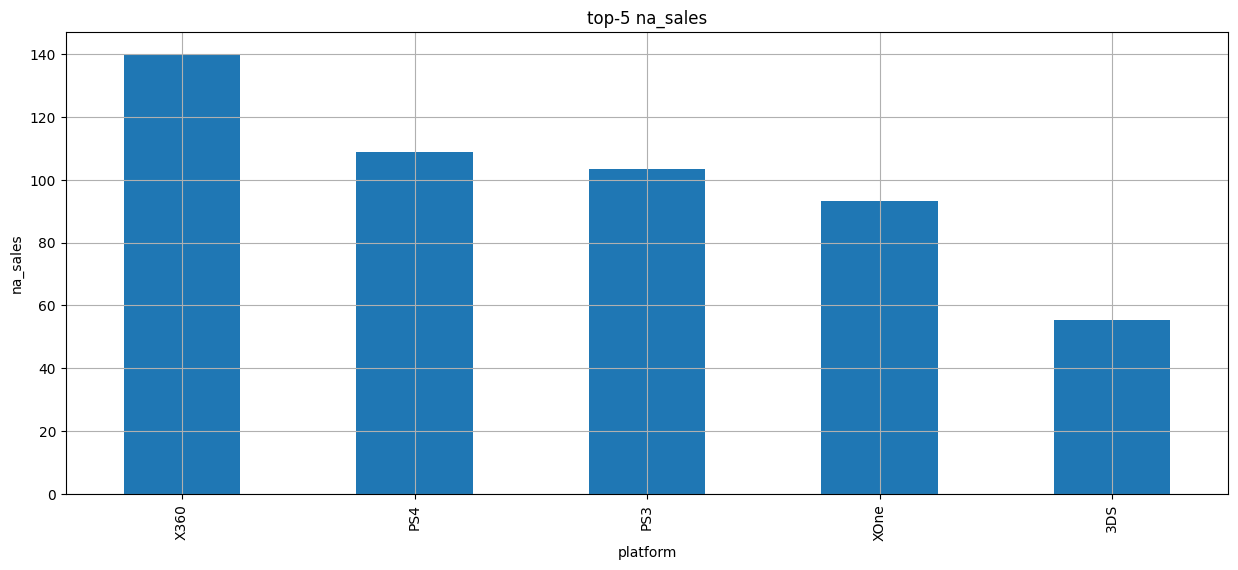

In [44]:
na_platform_stat.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(15,6), grid=True, title = 'top-5 na_sales')
plt.xlabel('platform')
plt.ylabel('na_sales')

In [45]:
na_genre_stat = games_12_16.pivot_table(index='genre', values='na_sales',
                            aggfunc=['sum'])
na_genre_stat.columns = ['na_genre_total' ]
na_genre_stat['na_genre_share'] = (na_genre_stat['na_genre_total']/(na_genre_stat['na_genre_total'].sum())) * 100
na_genre_stat.sort_values(by='na_genre_total',ascending=False).head().round(3)

,na_genre_total,na_genre_share
genre,,
Action,177.84,30.093
Shooter,144.77,24.497
Sports,81.53,13.796
Role-Playing,64.00,10.830
Misc,38.19,6.462


#####  Портрет пользоваталя Северной Америки
 
 - Самые популярные платформы по количеству проданных копий X360, PlayStation (PS3 и PS4), XOne, 3DS.
 - По сути рынок северной америки поделен между 2 производителями.
 - Nintendo 3DS в топ-3 по количеству, но всего 9,35% в продажах - невысокая стоимость игры.
 - по продажам впереди X360 (23,7%), PS4 (18,4%) и PS3 (17,49%). PS4 относительно новая на 2016 год платформа и PS3 не сразу уступает позиции. 

 - Среди жанров лидер по количеству продаж - Action (30%) и Shooter (24,5%). это более половины игр.
 - остальные жанры идут сo значительным отрывом.

#### Европа

In [46]:
eu_platform_stat = games_12_16.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5) 
# опрелделим популярные платформы по количеству копий
eu_platform_stat

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

Text(0, 0.5, 'eu_sales')

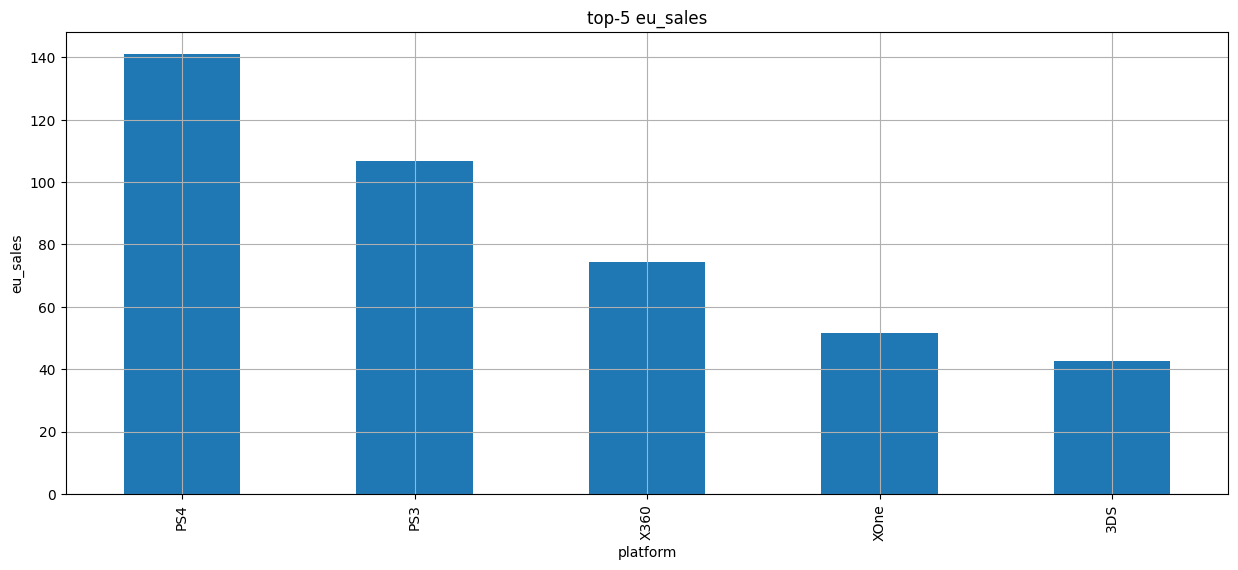

In [47]:
eu_platform_stat.plot(x = 'platform', y = 'eu_total', kind = 'bar', figsize=(15,6), grid=True, title = 'top-5 eu_sales')
plt.xlabel('platform')
plt.ylabel('eu_sales')

In [48]:
eu_genre_stat = games_12_16.pivot_table(index='genre', values='eu_sales',
                            aggfunc=['sum'])
eu_genre_stat.columns = ['eu_genre_total' ]
eu_genre_stat['eu_genre_share'] = (eu_genre_stat['eu_genre_total']/(eu_genre_stat['eu_genre_total'].sum())) * 100
eu_genre_stat.sort_values(by='eu_genre_total',ascending=False).head().round(3)

,eu_genre_total,eu_genre_share
genre,,
Action,159.34,31.439
Shooter,113.47,22.389
Sports,69.09,13.632
Role-Playing,48.53,9.575
Racing,27.29,5.385


#####  Портрет пользоваталя Европы
 - Рынок Европы похож по структуре на севароамериканский
 - Самые популярные платформы по количеству проданных копий PlayStation (PS3 и PS4), X360 и XOne, 3DS.
 - По сути рынок Европы так же в 2012-2016 поделен между 2 производителями.
 - Nintendo 3DS входит в топ-5 по количеству, но всего 9,35% в продажах - невысокая стоимость игры.
 - по продажам впереди X360 (23,7%), PS4 (18,4%) и PS3 (17,49%). PS4 относительно новая на 2016 год платформа и PS3 не сразу уступает позиции. 

 - Среди жанров лидер по количеству продаж - Action (31,43%) и Shooter (22,4%). это более половины игр.
 - остальные идут сj значительным отрывом.

#### Япония 

In [49]:
jp_platform_stat = games_12_16.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
jp_platform_stat

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

Text(0, 0.5, 'jp_sales')

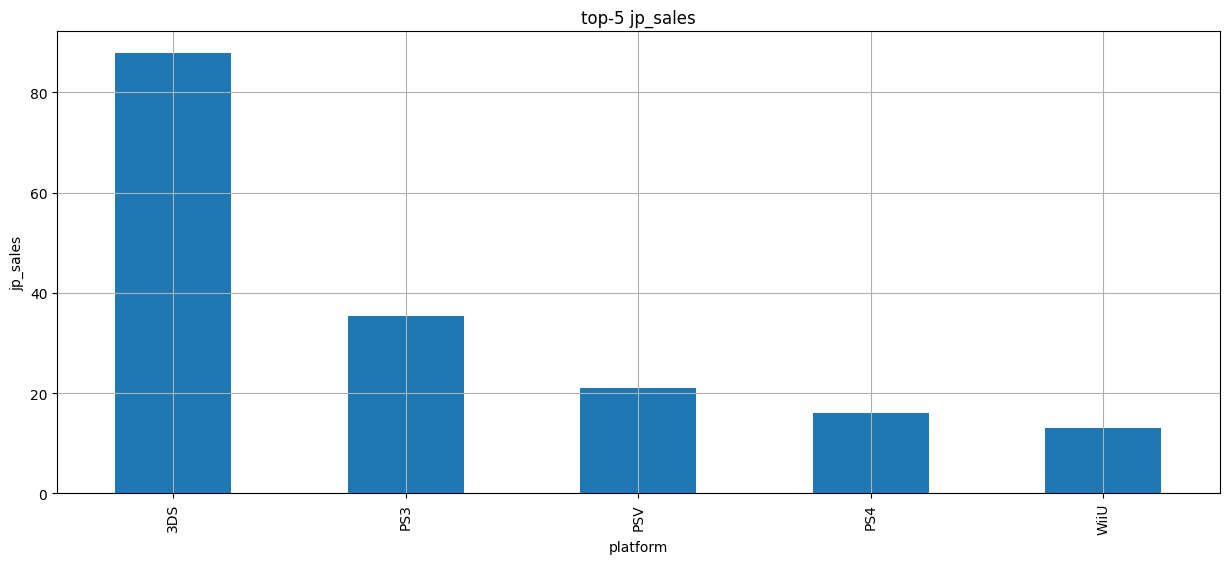

In [50]:
jp_platform_stat.plot(x = 'platform', y = 'jp_total', kind = 'bar', figsize=(15,6), grid=True, title = 'top-5 jp_sales')
plt.xlabel('platform')
plt.ylabel('jp_sales')

In [51]:
jp_genre_stat = games_12_16.pivot_table(index='genre', values='jp_sales',
                            aggfunc=['sum'])
jp_genre_stat.columns = ['jp_genre_total' ]
jp_genre_stat['jp_genre_share'] = (jp_genre_stat['jp_genre_total']/(jp_genre_stat['jp_genre_total'].sum())) * 100
jp_genre_stat.sort_values(by='jp_genre_total',ascending=False).head().round(3)

,jp_genre_total,jp_genre_share
genre,,
Role-Playing,65.44,33.981
Action,52.80,27.417
Misc,12.86,6.678
Simulation,10.41,5.406
Fighting,9.44,4.902


#####  Портрет пользоваталя Японии 
 - Рынок сильно отличается от европейского и североамериканского
 - Самые популярные платформы по количеству проданных копий Nintendo 3DS с большим отрывом, PlayStation (PS3, PS4 и PSV) в сумме меньше лидера, X360 и XOne отсутствуют в топ-5.
 - Большая доля портативных консолей от Nintendo (3DS) и PlayStation (PSV) - более 50%
 - 

 - Среди жанров лидеры по количеству продаж - Role-Playing (34%) и Action (27,5%), это более половины игр.
 - Остальные идут с0 значительным отрывом.
 - Японский рынок очень особенный.

#### Прочие

In [52]:
other_platform_stat = games_12_16.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)
other_platform_stat

platform
PS4     48.35
PS3     43.26
X360    20.40
XOne    14.27
3DS      8.87
Name: other_sales, dtype: float64

Text(0, 0.5, 'other_sales')

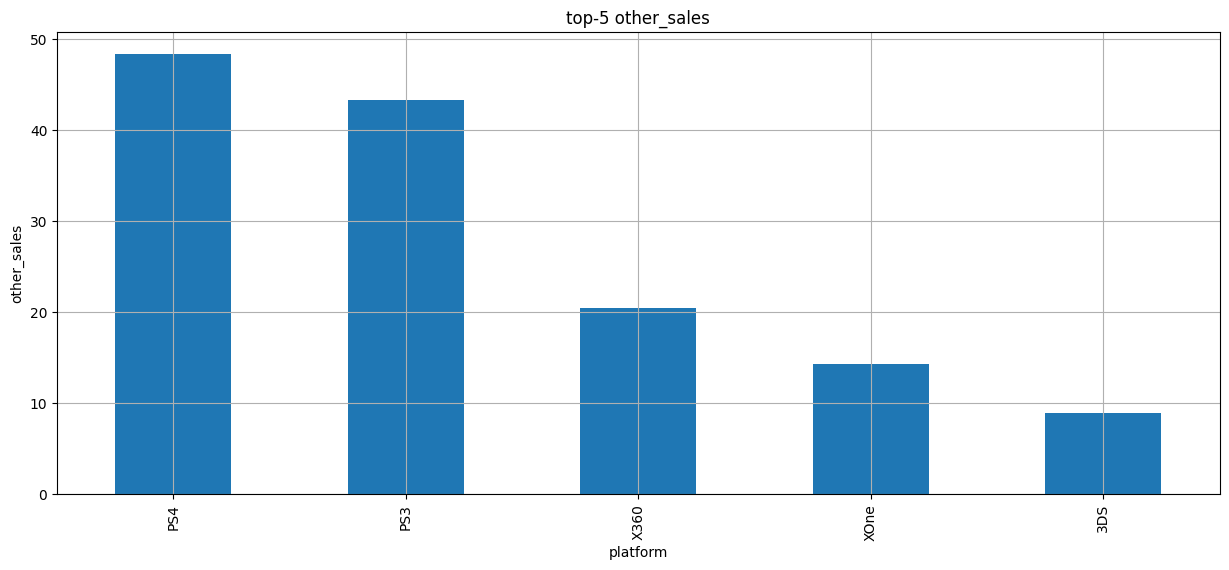

In [53]:
other_platform_stat.plot(x = 'platform', y = 'other_total', kind = 'bar', figsize=(15,6), grid=True, title = 'top-5 other_sales')
plt.xlabel('platform')
plt.ylabel('other_sales')

In [54]:
other_genre_stat = games_12_16.pivot_table(index='genre', values='other_sales',
                            aggfunc=['sum'])
other_genre_stat.columns = ['other_genre_total' ]
other_genre_stat['other_genre_share'] = (other_genre_stat['other_genre_total']/(other_genre_stat['other_genre_total'].sum())) * 100
other_genre_stat.sort_values(by='other_genre_total',ascending=False).head().round(3)

,other_genre_total,other_genre_share
genre,,
Action,51.14,32.748
Shooter,37.26,23.860
Sports,22.44,14.370
Role-Playing,14.83,9.497
Misc,7.67,4.912


#####  Портрет пользоваталя Прочие (other )
 - Рынок похож на европейский по распространению игровых платформ и на североамериканский и европейский по жанрам.
 - Объем рынка относительно основных регионов продаж маленький, сопоставим с Японией.


#### Влияние рейтингов ESRB на продажи

In [55]:
rating_dist_stat = games_12_16.groupby('rating')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()
rating_dist_stat

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,114.37,113.03,28.33,31.44
E10+,75.70,55.37,8.19,16.23
M,231.57,193.96,21.20,63.38
RP,103.31,91.50,108.84,27.17
T,66.02,52.96,26.02,17.94


In [56]:
(games_12_16                     
  .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales','other_sales']]   
  .agg('sum')                                                
  .apply(lambda x: round(x / float(x.sum()), 2))     # вот это считает проценты        
  ).reset_index() 

,rating,na_sales,eu_sales,jp_sales,other_sales
0,E,0.19,0.22,0.15,0.20
1,E10+,0.13,0.11,0.04,0.10
2,M,0.39,0.38,0.11,0.41
3,RP,0.17,0.18,0.57,0.17
4,T,0.11,0.10,0.14,0.11


#### Влияние рейтингов ESRB
- Рынок игр Северной Америки и Европы очень похожи - лидер игры для взрослых и всей семьи. 
- В аутсайдерах продаж подростковые игры.
- Япония  - для всей семьи и подростковые, оутсайдеры игры старше 10 лет. Напомним, что там большая доля мобильных консолей и лидирующее положение у Ролевых игр.
- Остальные страны - рынок схож с североамериканским и европейским.
- Одним из лидеров по продажам - игры без рейтинга:
    - в NА, EU и прочие на 3 месте - 17-18%
    - в JP на 1 месте (учитывая специфику рынка Японии) - 57%

### Проверка гипотез

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- H_0: Пользовательский рейтинг (user_score) платформы Xbox One = пользовательский рейтинг (user_score) платформы PC
- H_a: Пользовательский рейтинг (user_score) платформы Xbox One ≠ пользовательский рейтинг (user_score) платформы PC
- исходим из того, выборки разного размера и можно предположить, что дисперсии у генеральных совокупностей разные.
- берем актуальный период с 2012 по 2016 годы


alpha = 0.05

In [57]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

xone_score = games_12_16.loc[(games_12_16.platform == 'XOne') & (games_12_16['user_score'] > 0)]['user_score']

pc_score = games_12_16.loc[(games_12_16.platform == 'PC') & (games_12_16['user_score'] > 0)]['user_score']

results = st.ttest_ind(
    xone_score, 
    pc_score,
    equal_var=False
)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Проверив H_0 о равенстве средних двух генеральных совокупностей подтвердил нулевую гипотезу, это значит, что Средние пользовательские рейтинги платформ Xbox One и PC статистически значимо не различаются.

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.

- H_0: Пользовательский рейтинг (user_score) жанра Action = пользовательский рейтинг (user_score) жанра Sports  
- H_a: Пользовательский рейтинг (user_score) жанра Action ≠ пользовательский рейтинг (user_score) жанра Sports
- исходим из того, выборки разного размера и можно предположить, что дисперсии у генеральных совокупностей разные.
- берем актуальный период с 2012 по 2016 годы

alpha = 0.05

In [58]:
action_score = games_12_16.loc[(games_12_16.genre == 'Action') & (games_12_16['user_score'] > 0)]['user_score']

sports_score = games_12_16.loc[(games_12_16.genre == 'Sports') & (games_12_16['user_score'] > 0)]['user_score']

results = st.ttest_ind(
    action_score, 
    sports_score,
    equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Проверив H_0 о равенстве средних двух генеральных совокупностей подтвердил нулевую гипотезу, это значит, что средний пользовательский рейтинг жанров Action и Sports значимо различаюся.

## Вывод

###### Предобработка данных
- Был проведен анализ базы данных продаж компьютерных игр за период с 1980 по 2016 годы.
- Массив данных был очищен от строк без указания названия игр, без года выпуска.
- Значение tbd были заменены на NaN в User_Score есть 
- остальные пропуски решено оставить, т.к. нет единого механизма замены в оценках.
- названия Columns были приведены к единому стилю
- объединены рейтинги КА и Е в соответствии со сменой маркировки.

###### Исследование
- проведено исследование поколичеству продаж игр по годам. Выявлены 4 основных периода:
    - с 1980 по 1996 - медленный рост
    - с 1996 по 2005 - средний рост
    - с 2006 по 2011 - взрывной рост и пик продаж
    - с 2012 по 2016 - стабилизация рынка.
- периоды связаны с развитием компьютерной техники и развитием процессоров, а следовательно и сложности и цены игр.
- жизненный цикл платформы от 5 до 10 лет - это связано с развитием процессоров и локализацией платформ, часть платформ ушла в онлайн.
- Для дальнейшего иссследования выделен актуальный для внвлиза период с 2012 по 2016 годы, когда рынок игр приобрел современные черты и стабилизоровался.
- исследованы платформы для игр - PC постепенно уступил место игровым причтавкам и консолям. Лидирующие позиции занимают 2 платформы:
    - PS во всех вариациях
    - Xbox во всех вариациях
    - есть локальные рынки с преобладанием других платформ - Япония и Nindendo
- в актуальном периоде проведена аналитика по регионам продаж, основной рынок делят производителя платформ.
- Продажи тотал в среднем немного превышают 1 млн. Более миллиона Х360, PS3, PS4, XOne, Wii и WiiU.
- Среднее значение проданных копий игр по ТОП-5 платформам колеблется в пределах 0,6 - 0,8 млн. По всем платформам медиана около 0,2 млн копий.
- влияние рейтингов на продажи игр:
    - На продажи влияют рейтинги экспертов.
    - рейтинги пользователей маеньше влияют на продажи
    - у новых платформ PS4 и XOne влияние пользовательского рейтинга не так сильно выражено, как влияние рейтинга экспертов.
    - Коэффициент корелляции продаж и рейтинга пользователя: 0.004
    - Коэффициент корелляции продаж и рейтинга критиков: 0.308
- проведено исследование по жанрам и их доходности:
    - рынки Америки, Европы и прочие очень похожи по структуре продаж жанров
    - Рынок Японии существенно отличается по жанрам
    - самые продаваемые жанры в мире Action (441.12),Shooter (304.73) и Role-Playing (192.80).
- исследованы портреты пользователей разных регионов:
    - пользователь Северной Америки:
        - платформы  X360, PlayStation (PS3 и PS4), XOne, 3DS.
        - жанры по количеству продаж - Action (30%) и Shooter (24,5%)
    - Пользователь Европы поход на американского:
        - платформы PlayStation (PS3 и PS4), X360 и XOne, 3DS.
        - жанры по количеству продаж - Action (31,43%) и Shooter (22,4%)
    - Пользователь Японии - особый рынок по сравнению со всеми
        - платформы Nintendo 3DS с большим отрывом, PlayStation (PS3, PS4 и PSV) 
        - Большая доля портативных консолей от Nintendo (3DS) и PlayStation (PSV) - более 50%
        - жанры по количеству продаж - Role-Playing (34%) и Action (27,5%).
    - Прочие регионы повторяют рынок Северной Америки и Европы.
- Исследовано влияние рейтингов ESRB:
    - Северная Америка и Европа -  игры для взрослых и всей семьи.
    - Япония - для всей семьи и подростковые
    - Остальные страны - рынок схож с североамериканским и европейским.

##### Были проверены следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза не отвергнута
- Средние пользовательские рейтинги жанров Action и Sports разные - гипотеза не отвергнута
